In [3]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
plt.style.use('rose-pine-dawn')

In [4]:
THM_JSON = "/Users/matthewho/Documents/research/gfn_ntp/data/novel_premises_train_md3_tl30.json"
TEMP_DIR = Path("/Users/matthewho/Documents/research/lean-dojo-optimized-init/temp")
with open(THM_JSON, 'r') as f:
    data = json.load(f)

In [5]:
len(data)

27458

In [6]:
data = sorted(
    data,
    key=lambda thm: thm["start"][0]
)

In [9]:
def start_line(thm):
    return thm["start"][0]

In [10]:
start_lines = [start_line(thm) for thm in data]

In [16]:
start_lines = np.array(start_lines)

In [11]:
unique_ct = len(set(start_lines))

(array([2., 2., 0., ..., 0., 0., 1.]),
 array([   9. ,   10.6,   12.2, ..., 3893.8, 3895.4, 3897. ]),
 <BarContainer object of 2430 artists>)

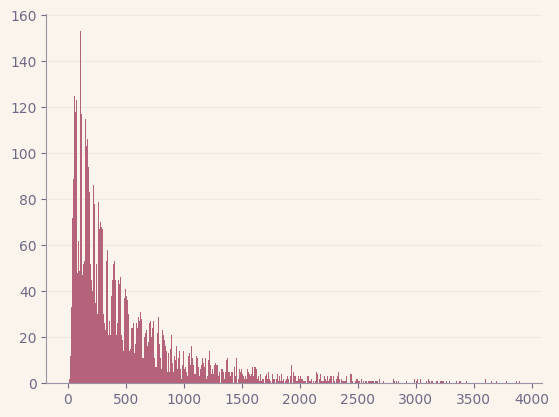

In [14]:
plt.hist(start_lines, bins=unique_ct)

In [17]:
def proportion_over(data, threshold):
    return np.mean(data > threshold)

In [22]:
print(f"Total theorems: {len(start_lines)}")
thresholds = range(200, 2200, 200)
for threshold in thresholds:
    print(f"Proportion of theorems over {threshold}: {proportion_over(start_lines, threshold)}")

Total theorems: 27458
Proportion of theorems over 200: 0.653980624954476
Proportion of theorems over 400: 0.41936776167237233
Proportion of theorems over 600: 0.2841794741059072
Proportion of theorems over 800: 0.1938961322747469
Proportion of theorems over 1000: 0.13722776604268336
Proportion of theorems over 1200: 0.09756719353193968
Proportion of theorems over 1400: 0.06941510670842742
Proportion of theorems over 1600: 0.04978512637482701
Proportion of theorems over 1800: 0.03565445407531503
Proportion of theorems over 2000: 0.02658605870784471


In [23]:
# print deciles of data
deciles = np.percentile(start_lines, range(0, 101, 10))
for i, decile in enumerate(deciles):
    print(f"Decile {i}: {decile}")

Decile 0: 9.0
Decile 1: 80.0
Decile 2: 124.0
Decile 3: 174.0
Decile 4: 235.0
Decile 5: 315.0
Decile 6: 423.0
Decile 7: 570.0
Decile 8: 784.0
Decile 9: 1184.0
Decile 10: 3897.0


In [29]:
def get_percentile_samples(sorted_list_of_dicts, samples):
    # Total number of dictionaries
    total_dicts = len(sorted_list_of_dicts)
    
    # Calculate indices for each decile: 10%, 20%, ..., 100%
    # We use max(0, i - 1) to ensure we do not use an index of -1 for the first decile.
    idxs = [max(0, int(total_dicts * i / samples) - 1) for i in range(1, samples + 1)]
    
    # Extract the dictionary at each decile index
    return [sorted_list_of_dicts[index] for index in idxs]

# Example usage
samples = get_percentile_samples(data, 16)

In [30]:
[start_line(thm) for thm in samples]

[64,
 90,
 119,
 148,
 180,
 219,
 263,
 315,
 378,
 454,
 548,
 673,
 818,
 1055,
 1462,
 3897]

In [33]:
samples = get_percentile_samples(data, 256)
with open("thms_by_start.json", 'w') as f:
    json.dump(samples, f, indent=4)